# Linear Regression
* many implementations of OLS in various Python libraries: NumPy, SciPy, statsmodels, scikit-learn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm

In [55]:
housing = pd.read_csv("data/Housing.csv")
housing.head()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
dtypes: int64(5)
memory usage: 21.4 KB


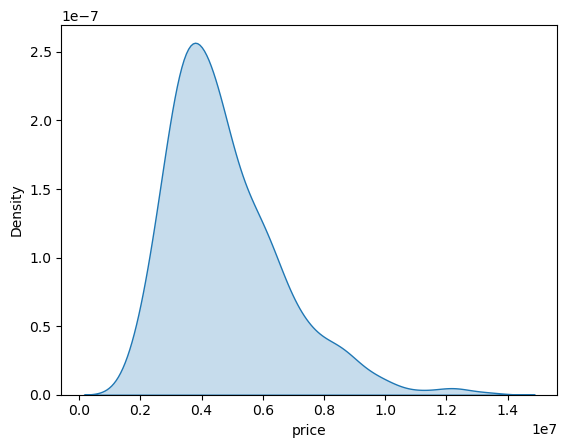

In [11]:
sb.kdeplot(housing.price, fill=True);

In [29]:
trimmed = housing[housing.price < 1e7].copy()

In [31]:
trimmed.describe()

,price,area,bedrooms,bathrooms,stories
count,5.370000e+02,537.000000,537.000000,537.000000,537.000000
mean,4.665349e+06,5090.325885,2.951583,1.268156,1.795158
std,1.683047e+06,2101.523995,0.731413,0.471947,0.861129
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000
25%,3.430000e+06,3570.000000,2.000000,1.000000,1.000000
50%,4.305000e+06,4510.000000,3.000000,1.000000,2.000000
75%,5.600000e+06,6350.000000,3.000000,2.000000,2.000000
max,9.870000e+06,15600.000000,6.000000,3.000000,4.000000


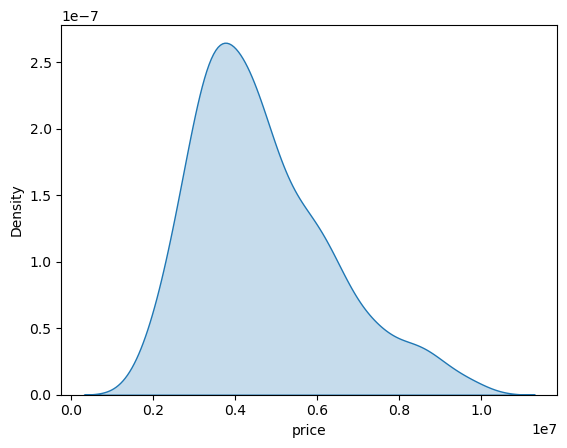

In [33]:
sb.kdeplot(trimmed['price'], fill= True);

In [43]:
corr = trimmed.corr()
corr['price'].sort_values(ascending = False)

price        1.000000
area         0.512505
bathrooms    0.468799
stories      0.427405
bedrooms     0.343036
Name: price, dtype: float64

In [82]:
y = trimmed.price / 1000
x = trimmed.area
x = sm.add_constant(x)

In [49]:
model = sm.OLS(y, x).fit()

In [51]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     190.6
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           2.67e-37
Time:                        19:21:45   Log-Likelihood:                -4668.7
No. Observations:                 537   AIC:                             9341.
Df Residuals:                     535   BIC:                             9350.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2576.0252    163.712     15.735      0.000    2254.428    2897.622
area           0.4104      0.030     13.805      0.000       0.352       0.469
==============================================================================
Omnibus:                       43.895   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.647
Skew:                           0.681   Prob(JB):                     1.36e-12
Kurtosis:                       3.766   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
sample = trimmed.sample(120)


In [72]:
y = sample.price / 1000
x = sample.area
x = sm.add_constant(x)

In [74]:
sample_model = sm.OLS(y, x).fit()

In [76]:
sample_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     26.37
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           1.12e-06
Time:                        19:34:06   Log-Likelihood:                -1061.3
No. Observations:                 120   AIC:                             2127.
Df Residuals:                     118   BIC:                             2132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3070.9703    383.256      8.013      0.000    2312.019    3829.921
area           0.3518      0.068      5.136      0.000       0.216       0.487
==============================================================================
Omnibus:                        7.621   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.396
Skew:                           0.596   Prob(JB):                       0.0248
Kurtosis:                       3.238   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

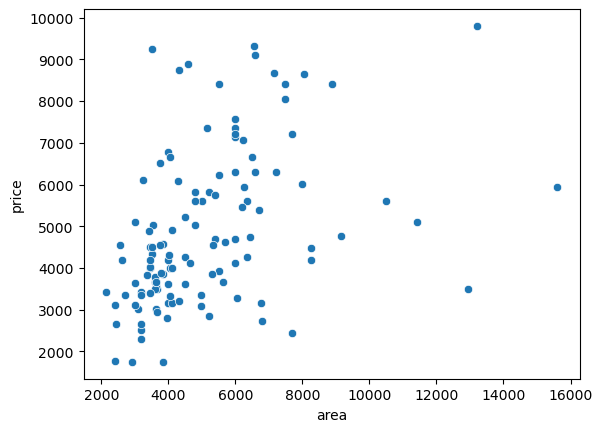

In [80]:
sb.scatterplot(x=x['area'], y=y);

In [89]:
np.sqrt(((y - model.predict(x)) ** 2).mean())

1443.8590958256073

In [84]:
model.predict(x)

8      5900.669524
9      4936.112232
10     7993.964071
11     5038.724710
12     5264.472161
          ...     
540    3807.374977
541    3561.105030
542    4061.853922
543    3770.434485
544    4156.257401
Length: 537, dtype: float64

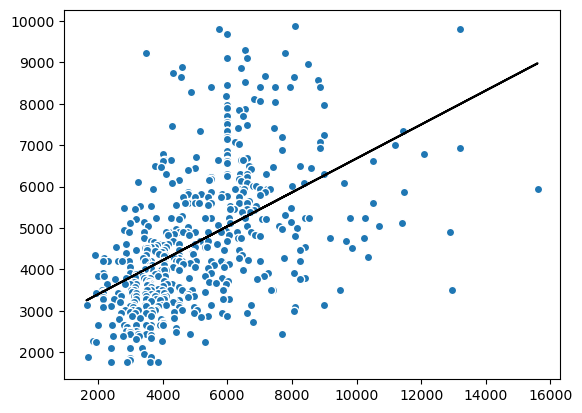

In [107]:
plt.scatter(x['area'], y, edgecolor='w')
plt.plot(x['area'], model.predict(x), 'k');

In [111]:
intercept, slope = model.params

In [113]:
x = trimmed[['area', 'bedrooms', 'bathrooms', 'stories']]
x = sm.add_constant(x)

In [115]:
multiple = sm.OLS(y, x).fit()

In [117]:
multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     139.6
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           1.68e-81
Time:                        19:48:13   Log-Likelihood:                -4557.8
No. Observations:                 537   AIC:                             9126.
Df Residuals:                     532   BIC:                             9147.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7206    242.070      0.086      0.932    -454.810     496.251
area           0.3577      0.025     14.584      0.000       0.310       0.406
bedrooms     172.0527     79.140      2.174      0.030      16.588     327.517
bathrooms   1065.9559    118.363      9.006      0.000     833.440    1298.472
stories      537.1025     65.897      8.151      0.000     407.652     666.553
==============================================================================
Omnibus:                       40.809   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.311
Skew:                           0.569   Prob(JB):                     1.32e-13
Kurtosis:                       4.164   Cond. No.                     2.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
np.sqrt(((y - multiple.predict(x)) ** 2).mean())

1174.465835516762

### sklearn

In [121]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [159]:
reg = linear_model.LinearRegression()

In [125]:
reg.fit(x,y)

LinearRegression()

In [127]:
reg.coef_

array([0.00000000e+00, 3.57701654e-01, 1.72052686e+02, 1.06595587e+03,
       5.37102461e+02])

In [136]:
mean_squared_error(y, reg.predict(x)) ** .5

1174.465835516762

In [138]:
r2_score(y, reg.predict(x))

0.5121369193324133

In [146]:
scale = StandardScaler()
min_max = MinMaxScaler()

In [157]:
scaled = scale.fit_transform(trimmed)
scaled = pd.DataFrame(scaled)
scaled.columns = housing.columns
scaled.head()

,price,area,bedrooms,bathrooms,stories
0,3.095282,1.433474,1.434750,-0.568721,0.238097
1,3.053652,0.314195,0.066258,1.552136,2.562795
2,3.053652,3.862547,0.066258,-0.568721,0.238097
3,2.982881,0.433268,1.434750,3.672993,0.238097
4,2.762242,0.695226,1.434750,1.552136,0.238097


In [161]:
x = scaled[['area', 'bedrooms', 'bathrooms', 'stories']]
y = scaled.price

In [163]:
reg.fit(x,y)

LinearRegression()

In [165]:
reg.coef_

array([0.44664157, 0.07477009, 0.29890723, 0.27480799])

In [171]:
r2_score(y, reg.predict(x))

0.5121369193324133